In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("/Users/user/Documents/GitHub/Applied-Data-Analytics/Datasets/dealerships.csv")


In [30]:
df

,Location,Net Annual Sales,Number of Female Employees
0,"Millburn, NJ",150803012.00000,27
1,"Los Angeles, CA",110872084.00000,17
2,"Houston, TX",183945873.00000,22
3,"Miami, FL",156355396.00000,18
4,"San Mateo, CA",143108603.00000,17
5,"Seattle, WA",142755480.00000,33
6,Arlington VA,144772604.00000,28
7,"Portland, OR",179608438.00000,32
8,"Reno, NV",145101244.00000,19
9,"Chicago, IL",171491596.00000,24


In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df.describe()

,Net Annual Sales,Number of Female Employees
count,20.00000,20.00000
mean,171603750.13500,25.80000
std,50152290.42091,6.14389
min,95512810.70000,17.00000
25%,145019084.00000,19.75000
50%,170130716.50000,27.00000
75%,182351823.75000,32.00000
max,350520724.00000,35.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f832c50>]],
      dtype=object)

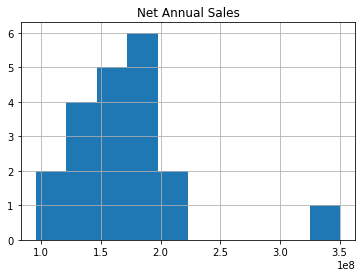

In [33]:
df.drop("Number of Female Employees",axis=1).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa38a50>]],
      dtype=object)

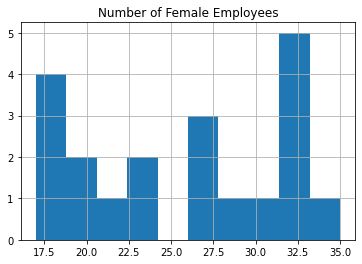

In [34]:
df.drop("Net Annual Sales",axis=1).hist()

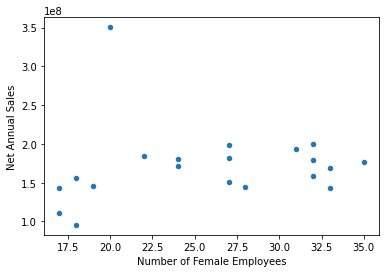

In [35]:
df.plot.scatter(x="Number of Female Employees",y="Net Annual Sales")

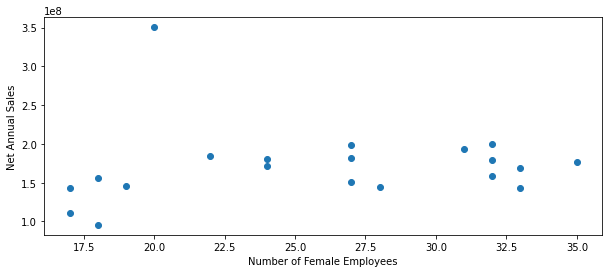

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df["Number of Female Employees"], df["Net Annual Sales"])
ax.set_xlabel("Number of Female Employees")
ax.set_ylabel("Net Annual Sales")
plt.show()

In [37]:
#The Outlier

df[df["Number of Female Employees"] == 20]

,Location,Net Annual Sales,Number of Female Employees
19,"Boston, MA",350520724.00000,20


In [38]:
df["quantiles"] = pd.qcut(df["Net Annual Sales"],q=4)

In [39]:
df

,Location,Net Annual Sales,Number of Female Employees,quantiles
0,"Millburn, NJ",150803012.00000,27,"(145019084.0, 170130716.5]"
1,"Los Angeles, CA",110872084.00000,17,"(95512810.699, 145019084.0]"
2,"Houston, TX",183945873.00000,22,"(182351823.75, 350520724.0]"
3,"Miami, FL",156355396.00000,18,"(145019084.0, 170130716.5]"
4,"San Mateo, CA",143108603.00000,17,"(95512810.699, 145019084.0]"
5,"Seattle, WA",142755480.00000,33,"(95512810.699, 145019084.0]"
6,Arlington VA,144772604.00000,28,"(95512810.699, 145019084.0]"
7,"Portland, OR",179608438.00000,32,"(170130716.5, 182351823.75]"
8,"Reno, NV",145101244.00000,19,"(145019084.0, 170130716.5]"
9,"Chicago, IL",171491596.00000,24,"(170130716.5, 182351823.75]"


In [50]:
df.sort_values(by="Net Annual Sales",ascending=True)["quantiles"].nunique()

4

In [53]:
df.sort_values(by="Net Annual Sales",ascending=True)["quantiles"].value_counts()

(182351823.75, 350520724.0]    5
(170130716.5, 182351823.75]    5
(145019084.0, 170130716.5]     5
(95512810.699, 145019084.0]    5
Name: quantiles, dtype: int64

#### Reveals that the correlation between these two features is low

In [54]:
df.corr(method ='pearson')

,Net Annual Sales,Number of Female Employees
Net Annual Sales,1.00000,0.10458
Number of Female Employees,0.10458,1.00000
